# Data Exploration with Script of Scripts

Bo Peng, May 2016


input: 
output: test.jpg

> test.jpg (28.8 KB)

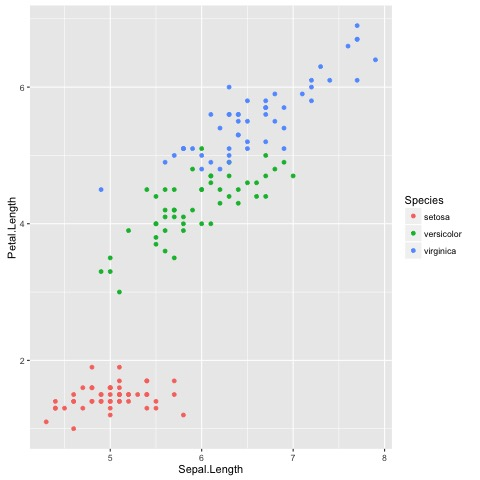

In [2]:
# This SoS step generates test.jpg by calling a R script, with 
# some variables passed by SoS
output: 'test.jpg'
R:
  library(ggplot2) 
  jpeg(${_output!r})
  qplot(Sepal.Length, Petal.Length, data = iris, color = Species)
  dev.off()

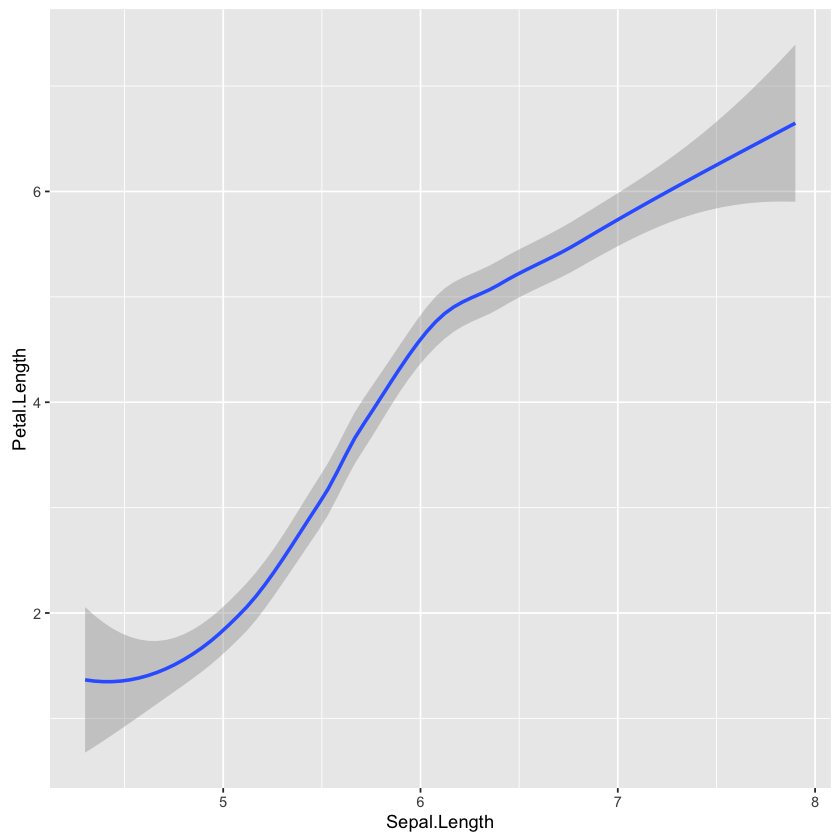

In [1]:
%with R
# here we call R directly by using an IR kernel
library(ggplot2)
qplot(Sepal.Length, Petal.Length, data = iris, geom='smooth')

In [6]:
# now we run a shell script in SoS
run:
    echo "Hi, This is from bash"

Hi, This is from bash


In [10]:
# Working with python directly in SoS, note that output is always a list
output: 'test.csv'
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randn(6,4),columns=list('ABCD'))
df.to_csv(output[0], index=False)

input: 
output: test.csv

> test.csv(first 10 rows)


,A,B,C,D
0,0.738291,1.060648,-1.172994,-0.578261
1,-0.648080,0.384150,0.927474,-0.481753
2,2.244066,-1.666360,0.442562,-0.049261
3,-0.474350,0.930548,-0.990037,-0.855603
4,0.167785,1.304679,0.984704,-1.372855
5,0.574771,-0.239782,0.432949,0.947838


In [12]:
# preview of gff file
output: 'test.gff'
with open('test.gff', 'w') as gff:
   gff.write('''human15.1 . gene            214301  215772 . +   . ID=HsG8283
human15.1 . mRNA            214360  215771 . +   . Comments=fixed+one+splice+junction;Parent=HsG8283;Evidence=7000000069743825;Transcript_type=Novel_Transcript;Name=Novel+Transcript%2C+variant+%28partial%29;ID=HsT20206
human15.1 . CDS             214360  214441 . +   . Parent=HsT20206
human15.1 . CDS             215299  215444 . +   . Parent=HsT20206
human15.1 . CDS             215641  215766 . +   . Parent=HsT20206
human15.1 . three_prime_UT  215767  215771 . +   . Parent=HsT20206
human15.1 . mRNA            214590  215772 . +   . Comments=fixed+one+splice+site%0A;Parent=HsG8283;Evidence=7000000069600840;Transcript_type=Novel_Transcript;Name=Novel+Transcript%2C+variant+%28partial%29;ID=HsT20207
human15.1 . five_prime_UTR  214590  214590 . +   . Parent=HsT20207
human15.1 . CDS             214591  214660 . +   . Parent=HsT20207
human15.1 . CDS             215299  215444 . +   . Parent=HsT20207
human15.1 . CDS             215641  215769 . +   . Parent=HsT20207''')

input: 
output: test.gff

> test.gff (1.0 KB)

human15.1 . gene 214301 215772 . + . ID=HsG8283
human15.1 . mRNA 214360 215771 . + . Comments=fixed+one+splice+junction;Parent=HsG8283;Evidence=7000000069743825;Transcript_type=Novel_Transcript;Name=Novel+Transcript%2C+variant+%28partial%29;ID=HsT20206
human15.1 . CDS 214360 214441 . + . Parent=HsT20206
human15.1 . CDS 215299 215444 . + . Parent=HsT20206
human15.1 . CDS 215641 215766 . + . Parent=HsT20206